<h3>Machine Learning usando clusterização agrupando alimentos por baixa, media e alta caloria</h3>
<h5>base de dados : mcdonald's india<br><br>
 <span style="font-size: 60px;">.</span>Utilizando os dados do dataset, documentado no arquivo India_Menu.csv<br>
 <span style="font-size: 60px;">.</span>temos o objetivo de agrupar os itens do cardapio em grupos de baixa , media e alta calorias<br>
 <span style="font-size: 60px;">.</span>e criar um codigo aonde os clientes poderao escolher seu pedido baseado no grupo de categorias <br>
 <span style="font-size: 60px;">.</span>escolhendo a opçao de menu e nesse menu se ele quer itens de baixa media ou alta calorias como opçao<br> <span style="font-size: 60px;">.</span>assim podendo optar por
 um lanche de baixa caloria se estiver de dieta e alta caloria se tiver com muita fome </h5>



In [3]:
#importando as bibliotecas 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from  dash_bootstrap_templates  import  ThemeSwitchAIO
templates = [
    "lux",
    "cyborg",
    "vapor",
    "zephyr",
    "superhero"
    "simplex"
]

ThemeSwitchAIO(templates)
pd.options.display.max_rows = 141



In [4]:
#abrindo o arquivo da nossa base de dados
tabela = pd.read_csv("India_Menu.csv")

In [5]:
#saber qual tipo das nossas variaveis e se existe valores faltantes 
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [6]:
#exibir os valores unicos das nossas variaveis temos 7 opcoes de menu principal e 141 items diferentes no cardapio
tabela.nunique()

Menu Category               7
Menu Items                141
Per Serve Size            107
Energy (kCal)             139
Protein (g)               117
Total fat (g)             111
Sat Fat (g)               107
Trans fat (g)              41
Cholesterols (mg)         113
Total carbohydrate (g)    133
Total Sugars (g)          125
Added Sugars (g)           79
Sodium (mg)               139
dtype: int64

In [7]:
#gerar uma estatistica resumida da base de dados 
tabela.describe(include='all')

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141,141,141,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
unique,7,141,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,McCafe Menu,McVeggie™ Burger,299 ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,51,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,NaN,NaN,NaN,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,NaN,NaN,NaN,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,NaN,NaN,NaN,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000


In [8]:
# sodium contem um valor invalido lanche do menu gourmet por essa categoria ter valores de sodium muito alto
# optei por mudar o valor nun pela media dos lanches do menu gourmet trocando o valor nun pelo valor 1267.88
display(tabela.isna().sum())

media = tabela[tabela['Menu Category'] == 'Gourmet Menu' ].mean()

tabela['Sodium (mg)'].fillna(media['Sodium (mg)'], inplace=True)

display(tabela.loc[111])

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

Menu Category                                  Gourmet Menu
Menu Items                Piri piri Mc Spicy Chicken Burger
Per Serve Size                                        228 g
Energy (kCal)                                         443.4
Protein (g)                                           25.63
Total fat (g)                                          17.3
Sat Fat (g)                                            4.01
Trans fat (g)                                          0.19
Cholesterols (mg)                                     64.19
Total carbohydrate (g)                                43.29
Total Sugars (g)                                       9.29
Added Sugars (g)                                       6.32
Sodium (mg)                                         1267.88
Name: 111, dtype: object

In [9]:
# mudei o formato das colunas 'Energy (kCal)','Sodium (mg)','Total carbohydrate (g)' para formato int valores inteiro 
# para melhorar a visualizaçao dos dados nao alterei as outras coluna pos os valores sao muito pequenos
# arredondar eles pra cima colocando em int poderia atrapalhar a analise 
tabela['Energy (kCal)'] = tabela['Energy (kCal)'].astype(int)
tabela['Sodium (mg)'] = tabela['Sodium (mg)'].astype(int)
tabela['Total carbohydrate (g)'] = tabela['Total carbohydrate (g)'].astype(int)
tabela.head(1)

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402,10.24,13.83,5.34,0.16,2.49,56,7.9,4.49,706


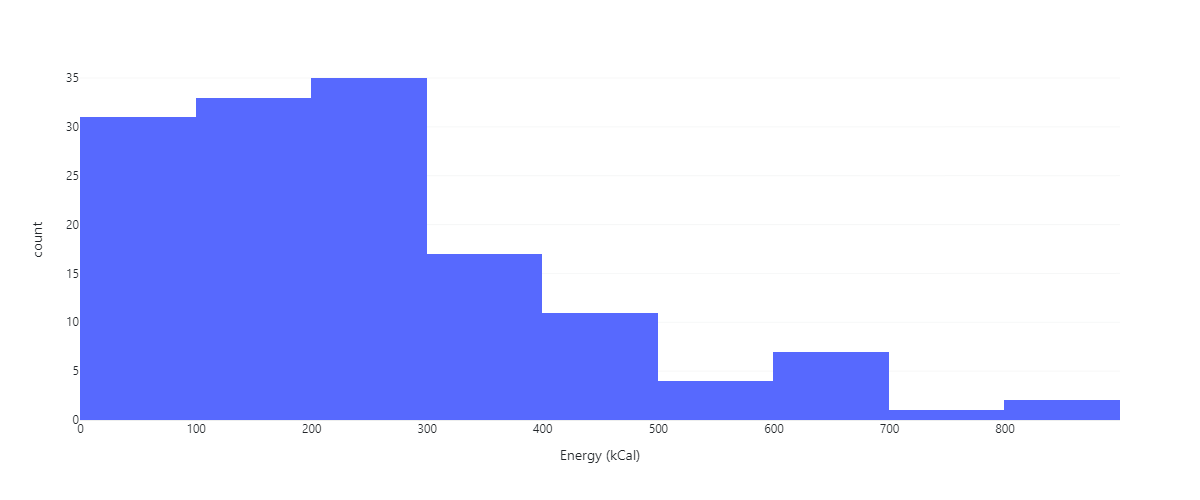

In [10]:
# grafico para saber como os dados estao distribuidos grande maioria esta situado entre 0 e 300 calorias 
fig = px.histogram(tabela, x='Energy (kCal)',width=1200)
fig.show('png')

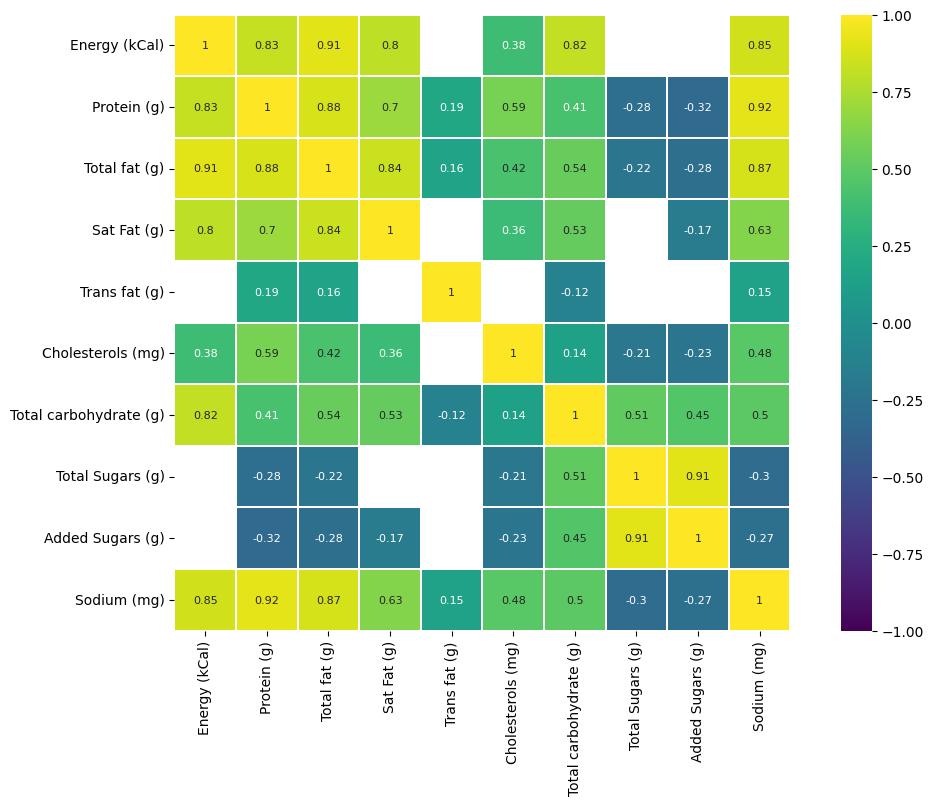

In [11]:
#grafico de corelaçao
corr = tabela.drop(['Menu Category', 'Menu Items'], axis=1).corr() # examinando as correlaçoes
plt.figure(figsize=(13, 8))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

In [12]:
# criando uma tabela dinamica que retorna a soma de calorias e proteina de todos os itens de cada menu
# focando na relacao calorias x proteina temos Breakfast Menu que entrega bastante proteina e pouca calorias 
# ja Beverages Menu entrega muita calorias e quase nada de proteina 
tabela_filtrada = tabela.get(['Menu Category','Energy (kCal)','Protein (g)'])

pivot_table = tabela_filtrada.pivot_table(values=['Energy (kCal)','Protein (g)'], index='Menu Category', aggfunc=sum)

pivot_table

,Energy (kCal),Protein (g)
Menu Category,,
Beverages Menu,2428,4.56
Breakfast Menu,2711,114.55
Condiments Menu,425,6.58
Desserts Menu,325,5.63
Gourmet Menu,5973,238.53
McCafe Menu,9342,219.07
Regular Menu,13220,467.67


In [56]:
#grafico abaixo criei uma funcao de grafico box plot
def graficos02(colunaY):
    fig = px.box(tabela, x = 'Menu Category', y = colunaY ,template = 'cyborg',width=1500)
    fig.update_layout(xaxis=dict(tickfont=dict(size=22)))
    fig.show('png')

#grafico abaixo bem complexo fiz so para testar skills mesmo
def grafico04(colunaY, colunaY2, colunaY3,colunaY4,colunaY5,colunaY6,colunaY7,colunaY8,colunaY9,colunaY10,
               titulo_01, titulo_02, titulo_03,titulo_04,titulo_05,titulo_06,titulo_07,titulo_08,titulo_09,titulo_10):
    fig = make_subplots(rows=5, cols=2, subplot_titles=(titulo_01, titulo_02, titulo_03,titulo_04,
                                                        titulo_05,titulo_06,titulo_07,titulo_08,titulo_09,titulo_10),shared_xaxes='rows')

    # Adicionando os gráficos aos subplots
    fig.add_trace(px.histogram(tabela, x='Menu Category', y=colunaY ,text_auto=True,histfunc='avg').data[0], row=5, col=1)
    fig.add_trace(px.histogram(tabela, x='Menu Category', y=colunaY2 ,text_auto=True,histfunc='avg').data[0], row=1, col=1)
    fig.add_trace(px.histogram(tabela, x='Menu Category', y=colunaY3 ,text_auto=True,histfunc='avg').data[0], row=2, col=1)
    fig.add_trace(px.histogram(tabela, x='Menu Category', y=colunaY4 ,text_auto=True,histfunc='avg').data[0], row=3, col=1)
    fig.add_trace(px.histogram(tabela, x='Menu Category', y=colunaY5 ,text_auto=True,histfunc='avg').data[0], row=4, col=1)
    fig.add_trace(px.histogram(tabela, x='Menu Category', y=colunaY6 ,text_auto=True,histfunc='avg').data[0], row=5, col=2)
    fig.add_trace(px.histogram(tabela, x='Menu Category', y=colunaY7 ,text_auto=True,histfunc='avg').data[0], row=1, col=2)
    fig.add_trace(px.histogram(tabela, x='Menu Category', y=colunaY8 ,text_auto=True,histfunc='avg').data[0], row=2, col=2)
    fig.add_trace(px.histogram(tabela, x='Menu Category', y=colunaY9 ,text_auto=True,histfunc='avg').data[0], row=3, col=2)
    fig.add_trace(px.histogram(tabela, x='Menu Category', y=colunaY10 ,text_auto=True,histfunc='avg').data[0], row=4, col=2)

    # Atualizando layout dos subplots
    fig.update_layout(template='vapor',font=dict(size=22), height=800,width=1500)
    fig.update_yaxes(tickformat=".2f", row=1, col=1)
    fig.update_yaxes(tickformat=".2f", row=2, col=1)
    fig.update_yaxes(tickformat=".2f", row=3, col=1)
    fig.update_yaxes(tickformat=".2f", row=4, col=1)
    fig.update_yaxes(tickformat=".2f", row=5, col=1)
    fig.update_yaxes(tickformat=".2f", row=1, col=2)
    fig.update_yaxes(tickformat=".2f", row=2, col=2)
    fig.update_yaxes(tickformat=".2f", row=3, col=2)
    fig.update_yaxes(tickformat=".2f", row=4, col=2)
    fig.update_yaxes(tickformat=".2f", row=5, col=2)
    # Mostrar os gráficos
    fig.show('png')
    

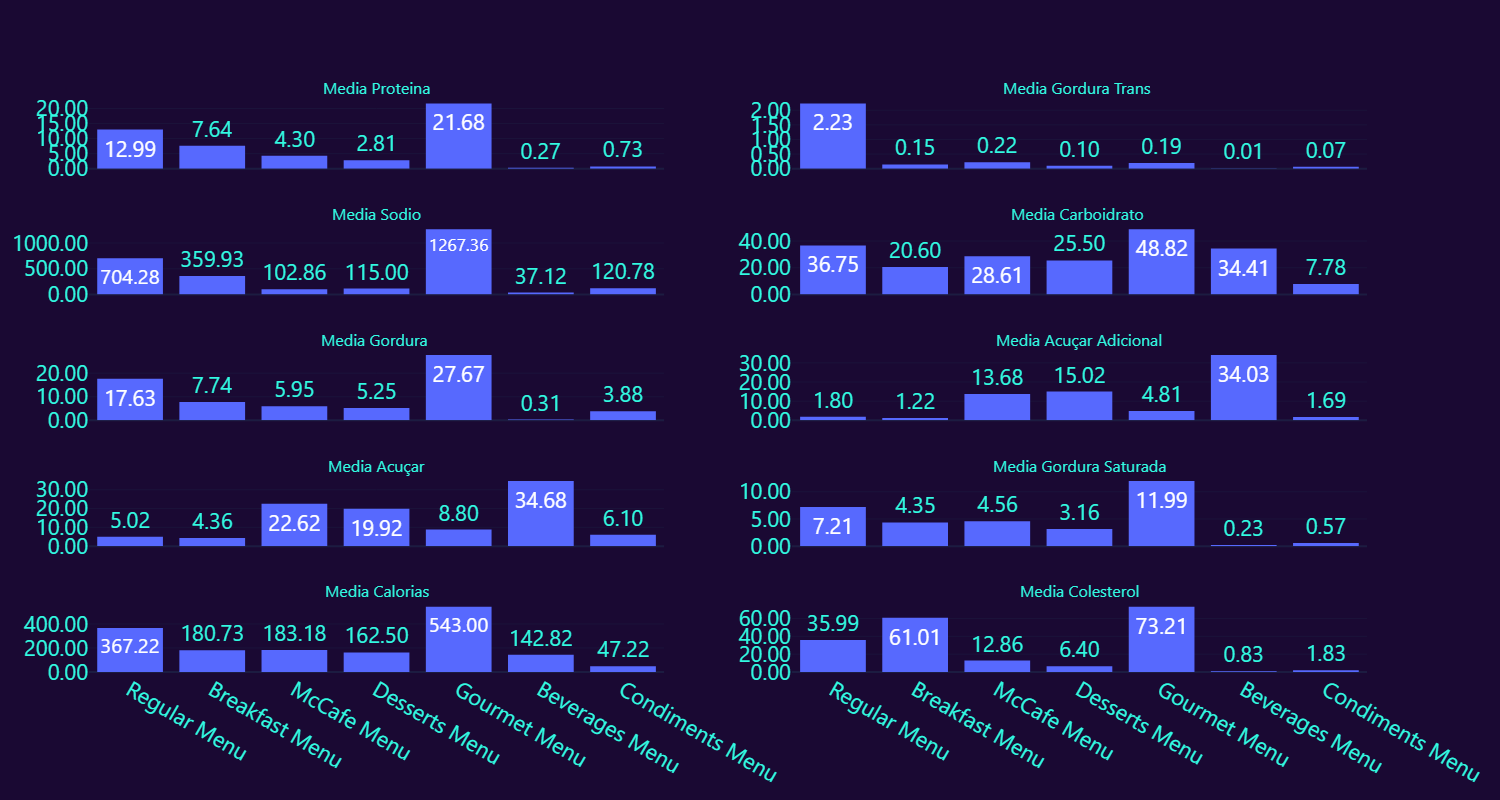

In [52]:
grafico04('Energy (kCal)','Protein (g)','Sodium (mg)', 'Total fat (g)','Total Sugars (g)',
          'Cholesterols (mg)','Trans fat (g)','Total carbohydrate (g)','Added Sugars (g)','Sat Fat (g)',
            'Media Proteina','Media Gordura Trans ','Media Sodio','Media Carboidrato ','Media Gordura ',
            'Media Acuçar Adicional','Media Acuçar','Media Gordura Saturada','Media Calorias','Media Colesterol',)

In [15]:
#criar aqui uma funçao que me retorna media e desvio padrao dos alvos selecionados
def media_desvio_padrao(menu,categoria):
    filtromenu = tabela[tabela['Menu Category'] == menu]
    media = filtromenu[categoria].mean().round()
    desvio_padrao = filtromenu[categoria].std().round()
    print(f'Media de {categoria} do {menu} e = {media}')
    print(f'desvio padrao de {categoria} do {menu} e = {desvio_padrao}')

In [16]:
#aqui pedi as metricas de  calorias do menu mc cafe
media_desvio_padrao('McCafe Menu','Energy (kCal)')

Media de Energy (kCal) do McCafe Menu e = 183.0
desvio padrao de Energy (kCal) do McCafe Menu e = 120.0


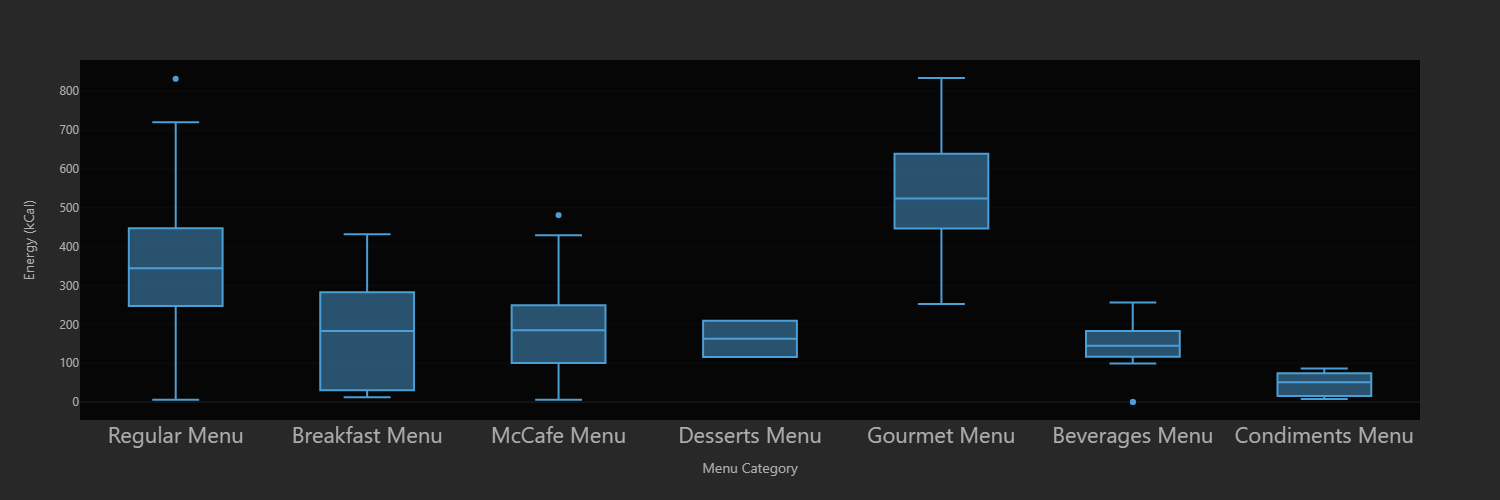

In [57]:
#box plot de calorias 
graficos02('Energy (kCal)')

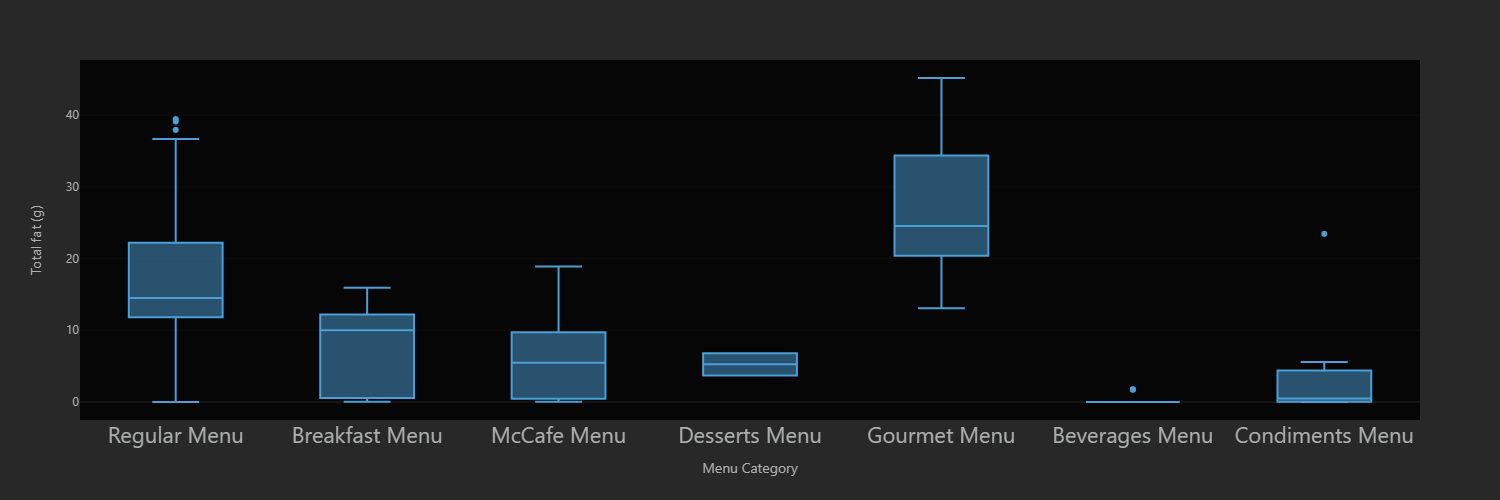

In [58]:
#box plot de gorduras total
graficos02('Total fat (g)')

In [19]:
#vou criar uma nova tabela tirando algumas colunas
tabela2 = tabela.drop(['Menu Category','Menu Items','Per Serve Size','Sodium (mg)'],axis=1)

In [65]:
#abaixo vou criar e treina o modelo Kmeans pra clusterizar os dados em 3 categorias
from sklearn.cluster import KMeans

# Criando o modelo K-Means com 3 clusters
kmeans = KMeans(n_clusters=3,random_state=10)

# Treinando o modelo
kmeans.fit(tabela2)

# Obtendo os rótulos dos clusters
labels = kmeans.labels_

# Obtendo os centróides dos clusters
centroids = kmeans.cluster_centers_
centroids

array([[3.10016129e+02, 9.67854839e+00, 1.23559677e+01, 6.58725806e+00,
        1.38564516e+00, 3.86275806e+01, 3.92580645e+01, 1.86812903e+01,
        1.13427419e+01],
       [9.40615385e+01, 1.90584615e+00, 2.74338462e+00, 1.64076923e+00,
        1.18769231e-01, 5.78430769e+00, 1.61846154e+01, 1.38427692e+01,
        1.05521538e+01],
       [6.49214286e+02, 2.37600000e+01, 3.31742857e+01, 1.35428571e+01,
        2.32857143e-01, 6.74621429e+01, 6.05714286e+01, 8.75214286e+00,
        4.88357143e+00]])

In [21]:
labels

array([0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
#criar a nova coluna grupos que vai receber labels
tabela['grupos'] = labels
tabela.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),grupos
0,Regular Menu,McVeggie™ Burger,168 g,402,10.24,13.83,5.34,0.16,2.49,56,7.90,4.49,706,0
1,Regular Menu,McAloo Tikki Burger®,146 g,339,8.50,11.31,4.27,0.20,1.47,50,7.05,4.07,545,0
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652,20.29,39.45,17.12,0.18,21.85,52,8.35,5.27,1074,2
3,Regular Menu,Spicy Paneer Wrap,250 g,674,20.96,39.10,19.73,0.26,40.93,59,3.50,1.08,1087,2
4,Regular Menu,American Veg Burger,177 g,512,15.30,23.45,10.51,0.17,25.24,56,7.85,4.76,1051,2


In [23]:
#criar uma funçao para modelar a coluna grupos 
def ajustando(self):
    if self == 0:
        return 'media calorias'
    if self == 1:
        return 'baixa calorias'
    if self == 2:
        return 'alta calorias'

In [24]:
#aplicando a funçao ajustando na coluna grupos
tabela['grupos'] = tabela['grupos'].apply(ajustando)

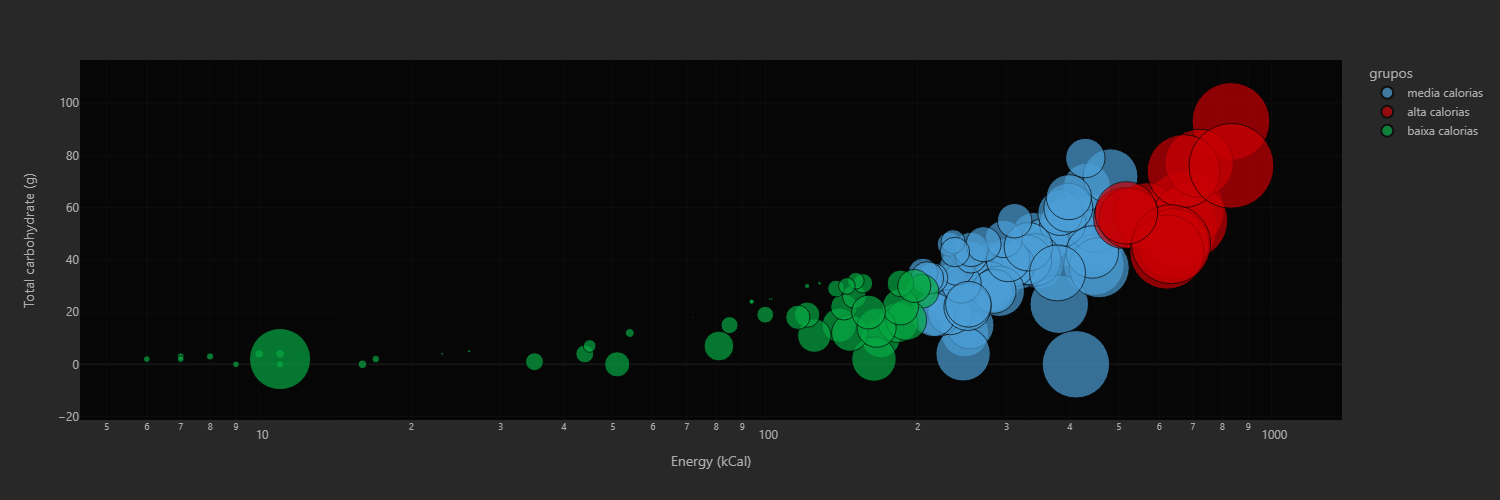

In [60]:
#plot grafico de dispersao saber como esta distribuidos os dados em relaçao a calorias ,carboidrato e gordura total
fig =px.scatter(tabela, x='Energy (kCal)', y='Total carbohydrate (g)',size='Total fat (g)',template='cyborg'
           , color='grupos',hover_name='Menu Items', log_x=True, size_max=60,width=1500)
fig.show('png')

In [26]:
tabela.head(1)

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),grupos
0,Regular Menu,McVeggie™ Burger,168 g,402,10.24,13.83,5.34,0.16,2.49,56,7.9,4.49,706,media calorias


In [27]:
# funçao de teste 
def cardapio(Menu_Category,grupos):
    filtro = tabela.loc[(tabela['Menu Category'] == Menu_Category) & (tabela['grupos'] == grupos)]
    display(filtro[['Menu Items','Per Serve Size', 'Energy (kCal)']])

In [28]:
cardapio('Regular Menu' , 'baixa calorias')

,Menu Items,Per Serve Size,Energy (kCal)
20,4 piece Chicken McNuggets,64 g,169
23,2 piece Chicken Strips,58 g,164
29,Regular Wedges,114 g,204
32,L1 Coffee,200 ml,6
33,L1 Coffee with milk,205 ml,35


In [61]:
#importanto Labelencoder e instanciando o mesmo
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [63]:
#criar a funçao que usuario vai selecionar a opçao e o programa vai retorna as opçao no cardapio compativel com a escolha do usuario
def cardapio1():
    dados1 = tabela.get('Menu Category')
    dados2 = tabela.get('grupos')
    dados3 = Label_Encoder.fit_transform(dados1)
    dados4 = Label_Encoder.fit_transform(dados2)
    tabela['categoria'] = dados4
    tabela['cardapio'] =  dados3
    
    print('digite uma das opçoes de menu \n0 = Beverages Menu\n1 = Breakfast Menu \n2 = Condiments Menu \n3 = Desserts Menu \n4 = Gourmet Menu \n5 = McCafe Menu \n6 = Regular Menu')
    
    opçoes_menu = int(input())

    print()

    print('digite uma das opçoes de calorias \n1 = baixa calorias\n2 = media calorias\n0 = alta calorias')

    quantidade_cal = int(input())
    
    filtro = tabela.loc[(tabela['cardapio'] == opçoes_menu) & (tabela['categoria'] == quantidade_cal)]

    display(filtro[['Menu Items','Per Serve Size', 'Energy (kCal)']].sort_values('Energy (kCal)').style.hide_index())

In [64]:
#usando a funçao 
cardapio1()


digite uma das opçoes de menu 
0 = Beverages Menu
1 = Breakfast Menu 
2 = Condiments Menu 
3 = Desserts Menu 
4 = Gourmet Menu 
5 = McCafe Menu 
6 = Regular Menu



digite uma das opçoes de calorias 
1 = baixa calorias
2 = media calorias
0 = alta calorias


Menu Items,Per Serve Size,Energy (kCal)
Espresso,26.5 ml,12
Americano (S),276.5 ml,12
Americano (R),347.5 ml,23
Americano (L),455 ml,26
Espresso Machiato,76.5 ml,44
Cappuccino (S),201.5 ml,125
Hash Brown,64 g,140
Cappuccino (R),297.5 ml,183
